In [50]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [105]:
constituency = []
winning_name = []
winning_party = []
margin = []
    
for i in range(1, 31):
    print(f'Getting Page: {page}')
    page = i
    path_url = 'https://results.eci.gov.in/Result2021/statewiseS25{}.htm'.format(page)

    response = requests.get(path_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table')

    rows = table.find_all(style='font-size:12px;')

    print(f'Number of Rows: {len(rows)}, Page: {page}')

    for i, r in enumerate(rows):
        contents = r.contents
        constituency.append(contents[0].contents[0])
        winning_name.append(contents[2].contents[0])
        winning_party.append(contents[3].contents[0].contents[0].contents[0].contents[0].contents[0])
        margin.append(int(contents[7].contents[0]))    

Getting Page: 1
Number of Rows: 10, Page: 1
Getting Page: 1
Number of Rows: 10, Page: 2
Getting Page: 2
Number of Rows: 10, Page: 3
Getting Page: 3
Number of Rows: 10, Page: 4
Getting Page: 4
Number of Rows: 10, Page: 5
Getting Page: 5
Number of Rows: 10, Page: 6
Getting Page: 6
Number of Rows: 10, Page: 7
Getting Page: 7
Number of Rows: 10, Page: 8
Getting Page: 8
Number of Rows: 10, Page: 9
Getting Page: 9
Number of Rows: 10, Page: 10
Getting Page: 10
Number of Rows: 10, Page: 11
Getting Page: 11
Number of Rows: 10, Page: 12
Getting Page: 12
Number of Rows: 10, Page: 13
Getting Page: 13
Number of Rows: 10, Page: 14
Getting Page: 14
Number of Rows: 10, Page: 15
Getting Page: 15
Number of Rows: 10, Page: 16
Getting Page: 16
Number of Rows: 10, Page: 17
Getting Page: 17
Number of Rows: 10, Page: 18
Getting Page: 18
Number of Rows: 10, Page: 19
Getting Page: 19
Number of Rows: 10, Page: 20
Getting Page: 20
Number of Rows: 10, Page: 21
Getting Page: 21
Number of Rows: 10, Page: 22
Getting

In [106]:
data = pd.DataFrame(constituency, columns=['constituency'])

data['winning_name'] = winning_name
data['winning_party']= winning_party
data['margin'] = margin
    

In [107]:
data.to_csv('Bengal_2021.csv', index=False)

## EDA

In [71]:
print(set(data['winning_party'].values))

{'Bharatiya Janata Party', 'Independent', 'All India Trinamool Congress', 'Indian National Congress', 'Revolutionary Socialist Party', 'Communist Party of India  (Marxist)', 'All India Forward Bloc', 'Communist Party of India', 'Gorkha Janmukti Morcha'}


In [74]:
len(data[data['winning_party'] == 'Indian National Congress'])

44

In [51]:
tmc_data = data[data['winning_party'] == 'All India Trinamool Congress']

<a list of 20 Patch objects>

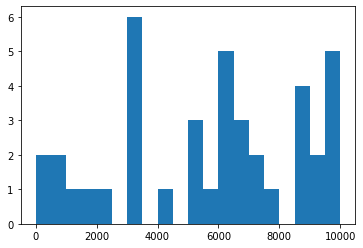

In [58]:
plt.hist(tmc_data['margin'].values, range=[0, 10000], bins=20)[2]

In [59]:
tmc_data[tmc_data['margin'] < 1000]

,constituency,winning_name,winning_party,margin
151,Katwa,RABINDRANATH CHATTERJEE,All India Trinamool Congress,911
198,Monteswar,SAJAL PANJA,All India Trinamool Congress,706
201,Murarai,ABDUR RAHAMAN (LITON),All India Trinamool Congress,280
238,Raina,NEPAL GHORUI,All India Trinamool Congress,448
